## This starts as an exploration for Titanic: Machine Learning from Disaster
## Multiple algorithms will be explored to get myself familiar with the common solutions

In [1]:
# Imports

# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn import metrics

from sklearn import preprocessing



/Users/tomzzh/Documents/After-Cornell/kaggle/titanic/env/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# get titanic & test csv files as a DataFrame
titanic_df = pd.read_csv("train.csv")

# preview the data
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### step 1: clean the data 

In [75]:
titanic_df.info()
# print("----------------------------")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
PassengerId            891 non-null int64
Survived               891 non-null int64
Pclass                 891 non-null int64
Name                   891 non-null object
Sex                    891 non-null int64
Age                    891 non-null int64
SibSp                  891 non-null int64
Parch                  891 non-null int64
Ticket                 891 non-null object
Fare                   891 non-null float64
Cabin                  204 non-null object
Embarked               891 non-null int64
age_categories         891 non-null int64
family_size            891 non-null int64
family_size_refined    891 non-null int64
avg_fare               891 non-null float64
fare_categories        891 non-null int64
name_split             891 non-null object
name_prefix            891 non-null object
dtypes: float64(2), int64(12), object(5)
memory usage: 132.3+ KB


## Step 2: visualize and clean data

#### Pclass

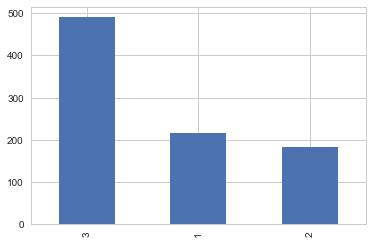

In [4]:
### check Pclass first
fig, ax = plt.subplots()
titanic_df['Pclass'].value_counts().plot(ax=ax, kind='bar')

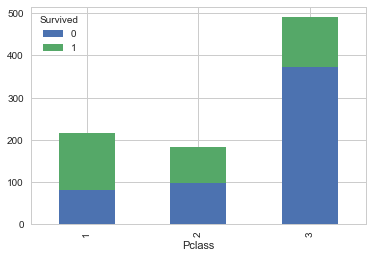

In [5]:
titanic_df_pclass = titanic_df.groupby(['Pclass', 'Survived'])['Survived'].count().unstack(level=-1)
titanic_df_pclass.plot(kind='bar', stacked=True)

In [6]:
titanic_df.groupby('Pclass')['Survived'].value_counts(normalize=True).xs(1,level='Survived')

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

#### Name

In [69]:
#### extract Mr. Miss and etc from Name field
titanic_df['name_split'] = titanic_df['Name'].apply(lambda x:x.split(",")[1].split()[0])
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_categories,family_size,family_size_refined,avg_fare,fare_categories,name_split
0,1,0,2,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7.2500,NaN,2,3,1,1,3.62500,0,Mr.
1,2,1,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,71.2833,C85,0,0,1,1,35.64165,1,Mrs.
2,3,1,2,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,7.9250,NaN,2,3,0,0,7.92500,2,Miss.
3,4,1,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,53.1000,C123,2,3,1,1,26.55000,1,Mrs.
4,5,0,2,"Allen, Mr. William Henry",1,35,0,0,373450,8.0500,NaN,2,3,0,0,8.05000,2,Mr.


In [70]:
#### check the distribution of name prefix
# fig, ax = plt.subplots()
titanic_df['name_split'].value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Mlle.          2
Major.         2
Col.           2
Capt.          1
Sir.           1
the            1
Don.           1
Jonkheer.      1
Ms.            1
Mme.           1
Lady.          1
Name: name_split, dtype: int64

In [73]:
### categorize them into reasonable buckets:
def categorize_name_prefix(x):
    if x in ['Mr.','Miss.','Mrs.','Master.']:
        return x
    else:
        return 'others'
titanic_df['name_prefix'] = titanic_df['name_split'].apply(lambda x:categorize_name_prefix(x))
titanic_df['name_prefix'].value_counts()

Mr.        517
Miss.      182
Mrs.       125
Master.     40
others      27
Name: name_prefix, dtype: int64

In [74]:
titanic_df.groupby('name_prefix')['Survived'].value_counts(normalize=True).xs(1,level='Survived')

name_prefix
Master.    0.575000
Miss.      0.697802
Mr.        0.156673
Mrs.       0.792000
others     0.444444
Name: Survived, dtype: float64

#### sex

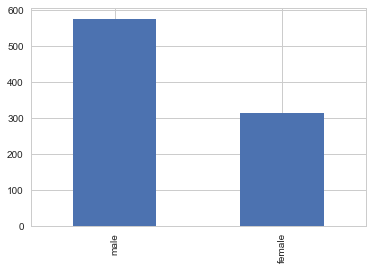

In [7]:
## sex
fig, ax = plt.subplots()
titanic_df['Sex'].value_counts().plot(ax=ax, kind='bar')

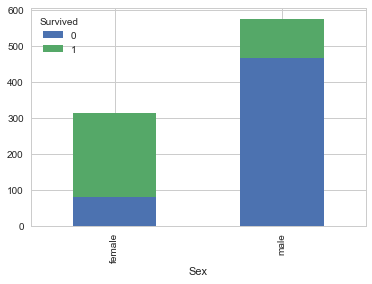

In [8]:
titanic_df_sex = titanic_df.groupby(['Sex', 'Survived'])['Survived'].count().unstack(level=-1)
titanic_df_sex.plot(kind='bar', stacked=True)

In [9]:
## replace sex with indicator
titanic_df.groupby('Sex')['Survived'].value_counts(normalize=True).xs(1,level='Survived')

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [10]:
## replace sex with indicator for model building
# titanic_df['Sex'] = titanic_df['Sex'].map({'female': 1, 'male': 0})

#### age

In [11]:
## test how to interpolate age parameter
## this methodology can be improved significantly after understanding other factors

age_avg  = titanic_df['Age'].mean()
age_std = titanic_df['Age'].std()
age_null_count = titanic_df['Age'].isnull().count()

age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
titanic_df['Age'][np.isnan(titanic_df['Age'])] = age_null_random_list
titanic_df['Age'] = titanic_df['Age'].astype(int)

/Users/tomzzh/Documents/After-Cornell/kaggle/titanic/env/lib/python2.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [13]:
## age
## it is interesting to check how other people are interpreting this variable
## group age together into bins to see the distribution
## reference: https://chrisalbon.com/python/pandas_binning_data.html
bins = [float("-inf"), 10, 35, 60, float("inf")]
group_names = ['child', 'youth', 'adult', 'old']
titanic_df['age_categories'] = pd.cut(titanic_df['Age'], bins, labels=group_names)

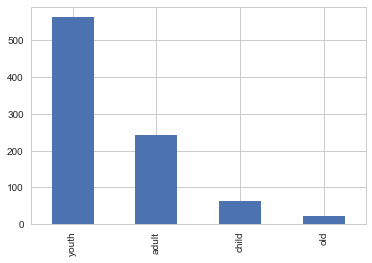

In [14]:
fig, ax = plt.subplots()
titanic_df['age_categories'].value_counts().plot(ax=ax, kind='bar')

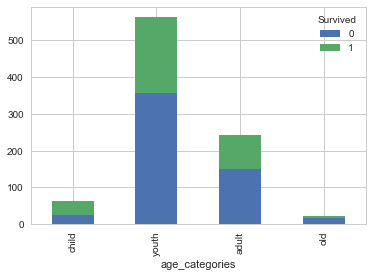

In [15]:
titanic_df_age_category = titanic_df.groupby(['age_categories', 'Survived'])['Survived'].count().unstack(level=-1)
titanic_df_age_category.plot(kind='bar', stacked=True)

In [16]:
titanic_df.groupby('age_categories')['Survived'].value_counts(normalize=True).xs(1,level='Survived')

age_categories
child    0.593750
youth    0.367673
adult    0.380165
old      0.227273
Name: Survived, dtype: float64

#### Embark

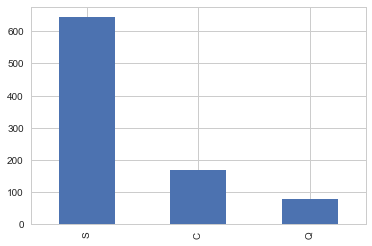

In [17]:
## Embarked
## try to find whether embarkation affects the probability
fig, ax = plt.subplots()
titanic_df['Embarked'].value_counts().plot(ax=ax, kind='bar')

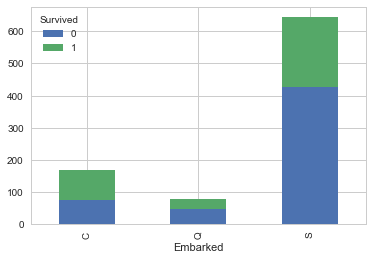

In [18]:
titanic_df_embark = titanic_df.groupby(['Embarked', 'Survived'])['Survived'].count().unstack(level=-1)
titanic_df_embark.plot(kind='bar', stacked=True)

In [19]:
## replace string with the right proxy
# titanic_df['Embarked'] = titanic_df['Embarked'].map({'C': 0, 'Q': 1, 'S':2})

In [20]:
## fill NA with right number
titanic_df['Embarked']=titanic_df['Embarked'].fillna('C')

In [21]:
titanic_df.groupby('Embarked')['Survived'].value_counts(normalize=True).xs(1,level='Survived')

Embarked
C    0.558824
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

#### some feature engineering

#### convert variable sibsp and parch to family size

In [22]:
#### family size 
titanic_df['family_size'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1
titanic_df.groupby('family_size')['Survived'].value_counts(normalize=True).xs(1,level='Survived')

family_size
1    0.303538
2    0.552795
3    0.578431
4    0.724138
5    0.200000
6    0.136364
7    0.333333
Name: Survived, dtype: float64

In [23]:
## check whether single really matters in terms of family size
def family_resize(x):
    return 0 if x is 1 else 1
titanic_df['family_size_refined'] = titanic_df['family_size'].apply(lambda x:family_resize(x))

In [24]:
titanic_df.groupby('family_size_refined')['Survived'].value_counts(normalize=True).xs(1,level='Survived')

family_size_refined
0    0.303538
1    0.505650
Name: Survived, dtype: float64

#### convert fare to average fare based on family size

In [25]:
#### check whether average fare is a better indicator than fare
titanic_df['avg_fare'] = titanic_df['Fare']/titanic_df['family_size']

In [26]:
print(titanic_df[['avg_fare']].describe())

         avg_fare
count  891.000000
mean    19.916375
std     35.841257
min      0.000000
25%      7.250000
50%      8.300000
75%     23.666667
max    512.329200


In [27]:
### this is a test
bins = [-1, 7.25, 8.3, 23.7, float("inf")]
group_names = ['cheap', 'lower-level', 'mid-level', 'expensive']
titanic_df['fare_categories'] = pd.cut(titanic_df['avg_fare'], bins, labels=group_names)

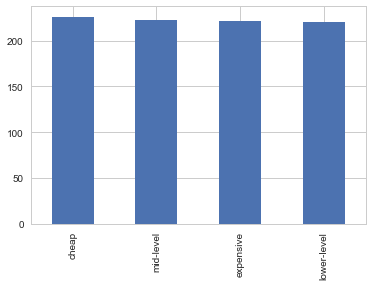

In [28]:
fig, ax = plt.subplots()
titanic_df['fare_categories'].value_counts().plot(ax=ax, kind='bar')

In [29]:
titanic_df.groupby('fare_categories')['Survived'].value_counts(normalize=True).xs(1,level='Survived')

fare_categories
cheap          0.265487
lower-level    0.254545
mid-level      0.408072
expensive      0.608108
Name: Survived, dtype: float64

### clean test data

In [77]:
### read test data separately to avoid pollution
test_df = pd.read_csv("test.csv")
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [78]:
age_avg  = test_df['Age'].mean()
age_std = test_df['Age'].std()
age_null_count = test_df['Age'].isnull().count()

age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
test_df['Age'][np.isnan(test_df['Age'])] = age_null_random_list
test_df['Age'] = test_df['Age'].astype(int)

/Users/tomzzh/Documents/After-Cornell/kaggle/titanic/env/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [79]:
# test_df['Sex'] = test_df['Sex'].map({'female': 1, 'male': 0})
# test_df['Embarked'] = test_df['Embarked'].map({'C': 0, 'Q': 1, 'S':2})
bins = [float("-inf"), 10, 35, 60, float("inf")]
group_names = ['child', 'youth', 'adult', 'old']
test_df['age_categories'] = pd.cut(test_df['Age'], bins, labels=group_names)

In [80]:
test_df['family_size'] = test_df['SibSp'] + test_df['Parch'] + 1
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].median())
test_df['avg_fare'] = test_df['Fare']/test_df['family_size']
bins = [-1, 7.25, 8.3, 23.7, float("inf")]
group_names = ['cheap', 'lower-level', 'mid-level', 'expensive']
test_df['fare_categories'] = pd.cut(test_df['avg_fare'], bins, labels=group_names)

In [81]:
test_df['name_split'] = test_df['Name'].apply(lambda x:x.split(",")[1].split()[0])
def categorize_name_prefix(x):
    if x in ['Mr.','Miss.','Mrs.','Master.']:
        return x
    else:
        return 'others'
test_df['name_prefix'] = test_df['name_split'].apply(lambda x:categorize_name_prefix(x))

## Step 3: encoding

In [82]:
def encode_features(df_train, df_test):
    features = ['Pclass','name_prefix','family_size','Sex','age_categories','Embarked','fare_categories']
    df_combined = pd.concat([df_train[features], df_test[features]])
    
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df_combined[feature])
        df_train[feature] = le.transform(df_train[feature])
        df_test[feature] = le.transform(df_test[feature])
    return df_train, df_test
    
data_train, data_test = encode_features(titanic_df, test_df)
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_categories,family_size,family_size_refined,avg_fare,fare_categories,name_split,name_prefix
0,1,0,2,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7.2500,NaN,2,3,1,1,3.62500,0,Mr.,2
1,2,1,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,71.2833,C85,0,0,1,1,35.64165,1,Mrs.,3
2,3,1,2,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,7.9250,NaN,2,3,0,0,7.92500,2,Miss.,1
3,4,1,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,53.1000,C123,2,3,1,1,26.55000,1,Mrs.,3
4,5,0,2,"Allen, Mr. William Henry",1,35,0,0,373450,8.0500,NaN,2,3,0,0,8.05000,2,Mr.,2


## Step 4: model building and selection

#### test a bunch of models at once

#### try to build a simple model before diving into deep

In [92]:
titanic_df_feature = data_train[['Survived','Pclass','name_prefix','family_size','age_categories','Sex','Embarked','fare_categories']]
test_df_feature = data_test[['Pclass','family_size','name_prefix','age_categories','Sex','Embarked','fare_categories']]

In [93]:
titanic_df_feature.head(5)

,Survived,Pclass,name_prefix,family_size,age_categories,Sex,Embarked,fare_categories
0,0,2,2,1,3,1,2,0
1,1,0,3,1,0,0,0,1
2,1,2,1,0,3,0,2,2
3,1,0,3,1,3,0,2,1
4,0,2,2,0,3,1,2,2


In [85]:
titanic_df_feature.head(5)

,Survived,Pclass,name_prefix,family_size,age_categories,Sex,Embarked,fare_categories
0,0,2,2,1,3,1,2,0
1,1,0,3,1,0,0,0,1
2,1,2,1,0,3,0,2,2
3,1,0,3,1,3,0,2,1
4,0,2,2,0,3,1,2,2


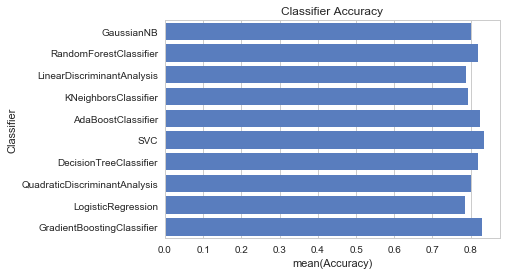

In [86]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()]

log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=0)

X = titanic_df_feature.values[0::, 1::]
y = titanic_df_feature.values[0::, 0]

acc_dict = {}

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    for clf in classifiers:
        name = clf.__class__.__name__
        clf.fit(X_train, y_train)
        train_predictions = clf.predict(X_test)
        acc = accuracy_score(y_test, train_predictions)
        if name in acc_dict:
            acc_dict[name] += acc
        else:
            acc_dict[name] = acc

for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf] / 10.0
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
    log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

In [87]:
log

,Classifier,Accuracy
0,GaussianNB,0.801111
0,RandomForestClassifier,0.820000
0,LinearDiscriminantAnalysis,0.786667
0,KNeighborsClassifier,0.792222
0,AdaBoostClassifier,0.823333
0,SVC,0.834444
0,DecisionTreeClassifier,0.818889
0,QuadraticDiscriminantAnalysis,0.801111
0,LogisticRegression,0.784444
0,GradientBoostingClassifier,0.828889


In [88]:
candidate_classifier = SVC()
candidate_classifier.fit(titanic_df_feature.values[0::, 1::], titanic_df_feature.values[0::, 0])
result = candidate_classifier.predict(test_df_feature.values)

In [89]:
result

array([1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1,

In [91]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": result
    })
submission.to_csv('titanic.csv', index=False)

### Other Relevant Analysis

#### cross validation

In [40]:
X = titanic_df_feature.values
y = titanic_df_feature['Survived'].values
 #drop survived  column
X


array([[0, 2, 1, ..., 1, 2, 0],
       [1, 0, 1, ..., 0, 0, 1],
       [1, 2, 0, ..., 0, 2, 2],
       ..., 
       [0, 2, 3, ..., 0, 2, 0],
       [1, 0, 0, ..., 1, 0, 1],
       [0, 2, 0, ..., 1, 1, 2]])

In [41]:
X = np.delete(X,0,axis=1) 
X

array([[2, 1, 3, 1, 2, 0],
       [0, 1, 0, 0, 0, 1],
       [2, 0, 3, 0, 2, 2],
       ..., 
       [2, 3, 0, 0, 2, 0],
       [0, 0, 3, 1, 0, 1],
       [2, 0, 3, 1, 1, 2]])

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6)
model_cross_validation = LogisticRegression()
model_cross_validation.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [43]:
predicted = model_cross_validation.predict(X_test)

In [44]:
print metrics.accuracy_score(y_test, predicted)

0.820895522388


In [45]:
print metrics.confusion_matrix(y_test, predicted)
print metrics.classification_report(y_test, predicted)

[[153  21]
 [ 27  67]]
             precision    recall  f1-score   support

          0       0.85      0.88      0.86       174
          1       0.76      0.71      0.74        94

avg / total       0.82      0.82      0.82       268



#### Now let's try 10-fold cross-validation, to see if the accuracy holds up more rigorously.

In [46]:
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print scores
print scores.mean()

[ 0.8         0.8         0.78651685  0.83146067  0.79775281  0.76404494
  0.79775281  0.78651685  0.84269663  0.80681818]
0.801355975485


the model below does not have a cross validaiton

In [47]:
X_train = titanic_df_feature.drop("Survived",axis=1)
Y_train = titanic_df_feature["Survived"]
X_test  = test_df_feature.drop("PassengerId",axis=1).copy()

In [48]:
# Logistic Regression

# should have created training and testing data to see the real difference

logreg = LogisticRegression()

logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

logreg.score(X_train, Y_train)

0.81144781144781142

In [49]:
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'ovr',
 'n_jobs': 1,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [100]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('titanic.csv', index=False)